# Assignment 1

In [96]:
import time
import numpy as np
import matplotlib.pyplot as plt
from gridworld import StochasticGridworld, DeterministicGridworld, make_random_gridworld
from agents import RandomAgent, Agent

## Task 1

In [97]:
task = StochasticGridworld()
random_agent = RandomAgent(task.observation_space, task.action_space)

obs = task.reset()

rewards = np.zeros((100, 100))
for run in range(100):
    for step in range(100):
        act = random_agent(obs)
        obs, rew, done, info = task.step(act)
        rewards[run, step] = rew
        
print("Average return: {}".format(rewards.sum(1).mean()))
print("Standard deviation: {}".format(rewards.sum(1).std()))

Average return: 102.55
Standard deviation: 50.30931822237308


## Task 2

In [89]:
class PolicyIterationAgent(Agent):
    
    def __init__(self, observation_space, action_space, gamma=0.9):   
        self.actions = action_space
        self.states = observation_space
        
        self.policy = np.zeros((self.states,), dtype=np.int)
        self.values  = np.zeros((self.states,), dtype=np.int)
        
        self.gamma = gamma

    def policy_evaluation(self, transitions, rewards):
        """
        transitions: np.array of size (S, A, S), with the corresponding to the current state, 
            the second to the action, and the third to the next state. The matrix encodes transition
            probabilities
        rewards: np.array of size (S) with single step rewards (reward are given for current state and are 
            independent of action)
        
        returns np.array of size(S) with new values after one step of policy evaluation
        """
        S, A, S_prime = transitions.shape
        values = np.zeros((S))
        
        for s in range(S):
            value = 0
            action = self.policy[s] 
            for s_prime in range(S_prime):
                value += transitions[s, action, s_prime] * (rewards[s] + self.gamma * self.values[s_prime])

            values[s] = value
        
        return values
                
        
    def policy_improvement(self, transitions, rewards):
        """
        transitions: np.array of size (S, A, S), with the corresponding to the current state, 
            the second to the action, and the third to the next state. The matrix encodes transition
            probabilities
        rewards: np.array of size (S) with single step rewards (reward are given for current state and are 
            independent of action)
        
        returns np.array of size(S) with new actions after one step of policy improvement
        """
  
        S, A, S_prime = transitions.shape
        all_values = np.zeros((S, A))
        
        for s in range(S):
            for a in range(A):
                value = 0
                for s_prime in range(S_prime):
                    value += transitions[s, a, s_prime] * (rewards[s] + self.gamma * self.values[s_prime])

                all_values[s, a] = value

        return np.argmax(all_values, axis=1)
            
 
    def run_policy_iteration(self, transitions, rewards):
        """
        Implements the main policy improvement loop. Do not change this code!
        """
        done_policy = False
        
        while not done_policy:
            done_value = False
            
            while not done_value:
                last_values = self.values.copy()
                self.values = self.policy_evaluation(transitions, rewards)
                done_value = np.all(np.isclose(last_values, self.values))
            last_policy = self.policy.copy()
            self.policy = self.policy_improvement(transitions, rewards)
            done_policy = np.all(last_policy == self.policy)
        
            
agent = PolicyIterationAgent(task.observation_space, task.action_space)
agent.run_policy_iteration(task.state_transition, task.rewards)

obs = task.reset()

rewards = np.zeros((100, 100))
for run in range(100):
    for step in range(100):
        act = agent(obs)
        obs, rew, done, info = task.step(act)
        rewards[run, step] = rew
        
print("Average return: {}".format(rewards.sum(1).mean()))
print("Standard deviation: {}".format(rewards.sum(1).std()))

Average return: 393.33
Standard deviation: 50.95037880133964


## Task 3

In [73]:
class ValueIterationAgent(Agent):
    
    def __init__(self, observation_space, action_space, gamma=0.9):   
        self.actions = action_space
        self.states = observation_space
        
        self.policy = np.zeros((self.states,), dtype=np.int)
        self.values  = np.zeros((self.states,), dtype=np.int)
        
        self.gamma = gamma

    def policy_evaluation(self, transitions, rewards):
        """
        transitions: np.array of size (S, A, S), with the corresponding to the current state, 
            the second to the action, and the third to the next state. The matrix encodes transition
            probabilities
        rewards: np.array of size (S) with single step rewards (reward are given for current state and are 
            independent of action)
        
        returns np.array of size(S) with new values after one step of policy evaluation
        """
        
        S, A, S_prime = transitions.shape
        all_values = np.zeros((S, A))
        
        for s in range(S):
            for a in range(A):
                value = 0
                for s_prime in range(S_prime):
                    value += transitions[s, a, s_prime] * (rewards[s] + self.gamma * self.values[s_prime])
                all_values[s, a] = value
        
        return np.max(all_values, axis=1)
        
    def policy_improvement(self, transitions, rewards):
        """
        transitions: np.array of size (S, A, S), with the corresponding to the current state, 
            the second to the action, and the third to the next state. The matrix encodes transition
            probabilities
        rewards: np.array of size (S) with single step rewards (reward are given for current state and are 
            independent of action)
        
        returns np.array of size(S) with new actions after one step of policy improvement
        """
        S, A, S_prime = transitions.shape
        all_values = np.zeros((S, A))
        
        for s in range(S):
            for a in range(A):
                value = 0
                for s_prime in range(S_prime):
                    value += transitions[s, a, s_prime] * (rewards[s] + self.gamma * self.values[s_prime])
                all_values[s, a] = value
   
        return np.argmax(all_values, axis=1)
        
    def run_value_iteration(self, transitions, rewards):
        
        done_value = False
        
        while not done_value:
            last_values = self.values.copy()
            self.values = self.policy_evaluation(transitions, rewards)
            done_value = np.all(np.isclose(last_values, self.values))
            
        self.policy = self.policy_improvement(transitions, rewards)
        
agent = ValueIterationAgent(task.observation_space, task.action_space)
agent.run_value_iteration(task.state_transition, task.rewards)

obs = task.reset()

rewards = np.zeros((100, 100))
for run in range(100):
    for step in range(100):
        act = agent(obs)
        obs, rew, done, info = task.step(act)
        rewards[run, step] = rew
        
print("Average return: {}".format(rewards.sum(1).mean()))

'''
Difference between PI and VI

VI directy applies the optimal Bellman operator at every iteration. This allows it to converge to the optimal
value function. Once it does, a single policy extration step is done to get the optimal policy.

However, PI performs 2 steps at each iteration: 
1. Policy evaluation: it applies the Bellman operator using a potentially suboptimal policy until convergence.
2. Policy improvment: improves the current policy by taking the actions that maximize the current value function
'''

Average return: 393.77


## Task 4

In [22]:
# make_random_gridworld returns a randomized gridworld with 
# transitions and rewards sampled from a uniform and normal 
# distributions respectively

# task = make_random_gridworld(num_states, num_actions)


# create at least 100 gridworlds of different sizes and plot the runtime of your algorithm
# you can use the python time module for timing

# POLICY ITERATION
pi_times = []

# Creating different lists for different worlds
sparse_s = list(range(1, 35))
const_small_a = [2]*34
const_big_a = [30]*34
dense_s = list(range(16, 50))
dense_a = list(range(16, 50))

# Creating gridworlds for P.I. and V.I. 
num_states = sparse_s + dense_s + sparse_s
num_actions = const_small_a + const_small_a + const_big_a

# Running and averaging times for P.I. and V.I.
for state, action in zip(num_states, num_actions):
    runtime = 0.
    
    for _ in range(10):
        
        task = make_random_gridworld(state, action)
        agent = PolicyIterationAgent(task.observation_space, task.action_space)
        start = time.time()
        agent.run_policy_iteration(task.state_transition, task.rewards)
        end = time.time()
        
        runtime += end - start
        
    pi_times.append(runtime/10)

# VALUE ITERATION
vi_times = []

num_states = sparse_s + dense_s + sparse_s
num_actions = const_small_a + const_small_a + const_big_a

for state, action in zip(num_states, num_actions):
    runtime = 0.
    for _ in range(10):
        
        task = make_random_gridworld(state, action)
        agent = ValueIterationAgent(task.observation_space, task.action_space)
        start = time.time()
        agent.run_value_iteration(task.state_transition, task.rewards)
        end = time.time()

        runtime += end - start
    vi_times.append(runtime/10)
    


Text(0, 0.5, 'seconds')

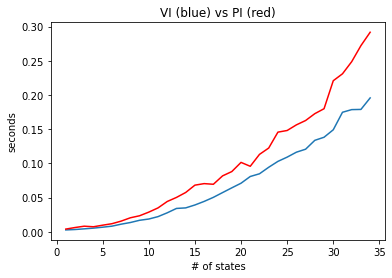

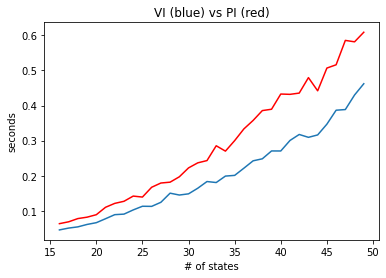

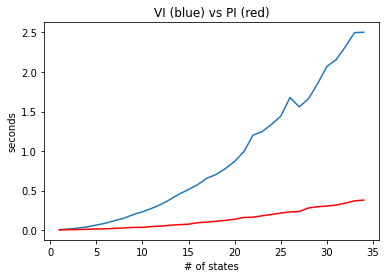

In [23]:
# Plotting runtime vs number of states
plt.figure()
plt.plot(sparse_s, vi_times[:34])
plt.plot(sparse_s, pi_times[:34], color="r")
plt.title("VI (blue) vs PI (red)")
plt.xlabel("# of states")
plt.ylabel("seconds")

plt.figure()
plt.plot(dense_s, vi_times[34:68])
plt.plot(dense_s, pi_times[34:68], color="r")
plt.title("VI (blue) vs PI (red)")
plt.xlabel("# of states")
plt.ylabel("seconds")

plt.figure()
plt.plot(sparse_s, vi_times[68:])
plt.plot(sparse_s, pi_times[68:], color="r")
plt.title("VI (blue) vs PI (red)")
plt.xlabel("# of states")
plt.ylabel("seconds")

Do the results conform with your expectations? Write a small discussion.

In [ ]:
'''
We can see that for gridworlds with small action and state spaces, value iteration 
is consitently faster than policy iteration. However, with a gridworld with a dense
action space and a sparse state space (3rd graph), policy iteration is much faster 
than value iteration. This makes sense as P.I. has less iterations than V.I. with 
O(S^3 + AS^2) per iteration whereas V.I. is O(AS^2). 

In the case of dense action space but sparse state space, AS^2 dominates the complexity, 
and as V.I. iterates more, it has to loop over A and S many more times than P.I. does, 
which why we see it is slower in the 3rd graph.

However with the first two graphs, S dominates the complexity, and since P.I. has an 
S^3 term in it, it stays slower than V.I. in those cases.
'''

In [120]:
# Here we see the difference in runtime per iteration

# VALUE ITERATION
vi_times = []

num_states = range(1, 30)
num_actions = [2]*30

for state, action in zip(num_states, num_actions):
    
    task = make_random_gridworld(state, action)
    agent = ValueIterationAgent(task.observation_space, task.action_space)
    
    times = []
    done_value = False
    while not done_value:

        start = time.time()
        last_values = agent.values.copy()
        agent.values = agent.policy_evaluation(task.state_transition, task.rewards)
        done_value = np.all(np.isclose(last_values, agent.values))
        end = time.time()
        
        times.append(end - start)

    agent.policy = agent.policy_improvement(task.state_transition, task.rewards)
    vi_times.append(np.mean(times))

    
# POLICY ITERATION
pi_times = []

for state, action in zip(num_states, num_actions):
    
    agent = PolicyIterationAgent(task.observation_space, task.action_space)
    agent.run_policy_iteration(task.state_transition, task.rewards)
    
    times = []
    done_policy = False

    while not done_policy:
        start = time.time()
        done_value = False

        while not done_value:
            last_values = agent.values.copy()
            agent.values = agent.policy_evaluation(task.state_transition, task.rewards)
            done_value = np.all(np.isclose(last_values, agent.values))
            
        last_policy = agent.policy.copy()
        agent.policy = agent.policy_improvement(task.state_transition, task.rewards)
        done_policy = np.all(last_policy == agent.policy)
        end = time.time()
        
        times.append(end - start)

    pi_times.append(np.mean(times))

Text(0, 0.5, 'seconds')

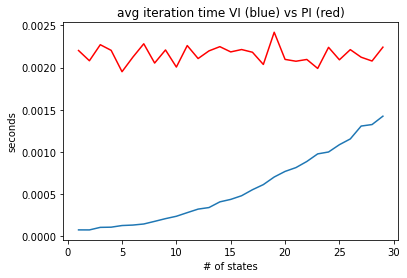

In [121]:
plt.figure()
plt.plot(num_states, vi_times)
plt.plot(num_states, pi_times, color="r")
plt.title("avg iteration time VI (blue) vs PI (red)")
plt.xlabel("# of states")
plt.ylabel("seconds")

In [ ]:
'''
We can see that an iteration of V.I. is consistently faster than one of P.I. as expected.
But in this graph, the number of states grows linearly which is why we see that V.I. 
iterations are getting slower and slower, but remain faster than P.I.
'''